# Práctica 4: Acceso a datos

## Introducción

En esta práctica accederemos a la Wikipedia para recabar los datos de población de un conjunto de países y realizaremos algunas representaciones gráficas.

En la página web titulada [*List of countries by past and projected future population*](https://en.wikipedia.org/wiki/List_of_countries_by_past_and_projected_future_population) se muestra la evolución de un buen número de países y territorios del mundo entre 1950 y 2050, organizada en un conjunto de tablas. En esta práctica combinaremos los datos de todos los países-territorios y todos los años en una sola trama de datos de pandas, y visualizaremos los cambios en la población de los distintos países-territorios.

### Utilizaremos en esta práctica las siguientes librerías:

[pandas](https://pandas.pydata.org/) proporciona estructuras de datos fáciles de usar y funciones de acceso a datos desde múltiples fuentes y formatos. Además permite crear visualizaciones de datos sencillas.

[matplotlib](https://matplotlib.org/) permite generar múltiples tipos de gráficos con un alto nivel de personalización.

[seaborn](https://seaborn.pydata.org/) facilita la creación de gráficos estadísticos con una sintaxis más sencilla y una apariencia más atractiva por defecto.

### Realizaremos esta práctica en los siguientes pasos:

* Reunir los datos en una trama de datos pandas.
* Visualizar los datos con diferentes librerías
* .

A continuación indicamos algunas operaciones iniciales para incorporar al proyecto algunas librerías útiles.

In [1]:
# Importamos las librerías pandas, matplotlib y seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Indicamos que los gráficos se muestren directamente debajo de las celdas de código en el cuaderno
%matplotlib inline

## Extraer las tablas a partir de un documento HTML de la Wikipedia

En este documento HTML el separador de decimales es el punto y el de miles es la coma. Utilizaremos el método `read_html()` de la librería pandas para leer las tablas que hay en el fichero HTML. Con la función `len()` podemos ver el número de tablas que hemo
s leído con datos de países (no incluir la tabla de la sección *UN Forecast 2024*).

In [2]:
# Identificamos y guardamos la URL en una variable

url = "https://en.wikipedia.org/wiki/List_of_countries_by_past_and_projected_future_population"

In [3]:
# Leemos las tablas del documento HTML
tables = pd.read_html(url, index_col='Country (or dependent territory)', match='Country')
tables.pop(0)
print(f"Número de tablas encontradas: {len(tables)}")

Número de tablas encontradas: 3


## Construir una sola tabla con la información de población

Reunimos las tablas con los diferentes periodos en una sola tabla, extraemos la cabecera para inspeccionar las primeras filas de la tabla, y nos quedamos con las columnas que corresponden solamente a fechas.

In [27]:
# Reunimos las tres tablas en una sola
df = pd.concat(tables, axis=1)

# Inspeccionamos las primeras filas de la tabla
print(df.head())

# Nos quedamos con las columnas que corresponden solamente a fechas
df = df.filter(regex=r'^\d{4}$')

# Mostramos las primeras filas de la tabla resultante
df

                                  1950  1955     %   1960   %.1   1965    %.2  \
Country (or dependent territory)                                                
Afghanistan                       8151  8892  1.76   9830  2.03  10998   2.27   
Albania                           1228  1393  2.56   1624  3.12   1884   3.02   
Algeria                           8893  9842  2.05  10910  2.08  11964   1.86   
American Samoa                      20    20  0.72     21  0.20     25   4.23   
Andorra                              7     7  0.04      9  6.28     14  10.17   

                                   1970   %.3   1975  ...   2030   %.2   2035  \
Country (or dependent territory)                      ...                       
Afghanistan                       12431  2.48  14133  ...  45665  2.12  50195   
Albania                            2157  2.74   2402  ...   3103 -0.01   3063   
Algeria                           13932  3.09  16141  ...  48149  0.99  50118   
American Samoa             

,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,...,2005,2010,2015,2020,2025,2030,2035,2040,2045,2050
Country (or dependent territory),,,,,,,,,,,,,,,,,,,,,
Afghanistan,8151,8892,9830,10998,12431,14133,15045,13120.0,13569.0,19446.0,...,26335.0,29121.0,32565.0,36644,41118,45665,50195,54717,59256,63796
Albania,1228,1393,1624,1884,2157,2402,2672,2957.0,3245.0,3159.0,...,3025.0,2987.0,3030.0,3075,3105,3103,3063,2994,2913,2825
Algeria,8893,9842,10910,11964,13932,16141,18807,22009.0,25191.0,28322.0,...,32918.0,35950.0,39543.0,42973,45842,48149,50118,52030,53894,55445
American Samoa,20,20,21,25,28,30,33,39.0,48.0,54.0,...,57.0,56.0,55.0,54,54,53,52,51,50,50
Andorra,7,7,9,14,20,27,34,45.0,53.0,64.0,...,77.0,85.0,86.0,86,86,85,83,82,79,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Sahara,10,16,28,50,90,73,125,180.0,218.0,264.0,...,416.0,492.0,571.0,653,736,822,909,998,1086,1174
Yemen,4778,5266,5872,6511,7099,7935,9133,10540.0,12417.0,14832.0,...,20003.0,23210.0,26738.0,29885,32823,35660,38437,41142,43710,46081
Zambia,2554,2870,3255,3695,4241,4849,5541,6536.0,7604.0,8691.0,...,11373.0,13042.0,15067.0,17427,20105,23137,26546,30339,34497,38993


## Dibujar la población de cuatro países en un año

Dibujar mediante un diagrama de barras la población de Argentina, Suecia, Polonia y Libia en 1995, ordenadas de menor a mayor.

In [5]:
# Seleccionamos los datos de los países el año 1995
paises = ['Argentina', 'Sweden', 'Poland', 'Libya']
poblacion_1995 = df.loc[paises, '1995'].sort_values()

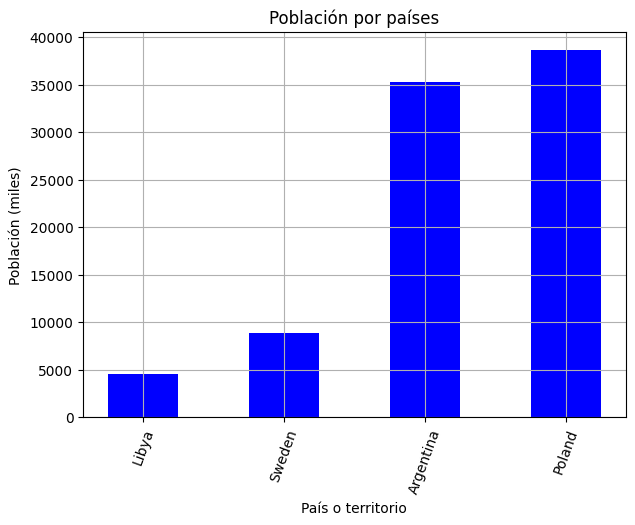

In [6]:
# Mediante matplotlib
plt.figure(figsize=(7,5))
plt.bar(poblacion_1995.index, poblacion_1995.values, width=0.5, color='blue')
plt.xlabel('País o territorio')
plt.ylabel('Población (miles)')
plt.xticks(rotation=70)
plt.title('Población por países')
plt.grid(True)
plt.show()

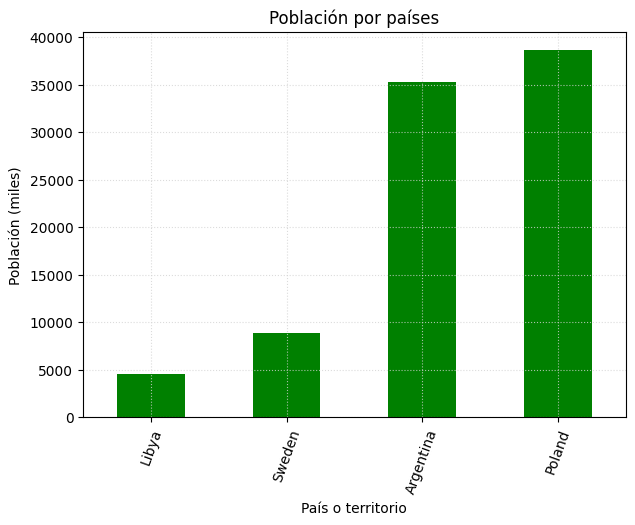

In [7]:
# Mediante pandas

poblacion_1995.plot(kind='bar', figsize=(7,5), color='green')
plt.xlabel('País o territorio')
plt.ylabel('Población (miles)')
plt.xticks(rotation=70)
plt.title('Población por países')
plt.grid(color='lightgray', linestyle=':', alpha=0.8)
plt.show()

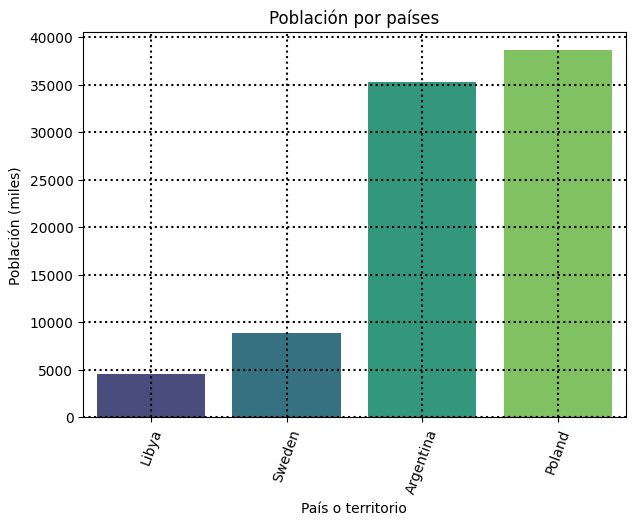

In [8]:
# Mediante seaborn

plt.figure(figsize=(7,5))
sns.barplot(x=poblacion_1995.index, y=poblacion_1995.values, hue=poblacion_1995.index, palette='viridis')
plt.xlabel('País o territorio')
plt.ylabel('Población (miles)')
plt.xticks(rotation=70)
plt.title('Población por países')
plt.grid(color='k', linestyle=':', linewidth=1.5)
plt.show()

## Dibujar la evolución de la población de cuatro países

Dibujar la evolución de la población en todo el periodo para los siguientes países: Alemania, España, Estados Unidos e Italia.

In [9]:
# Seleccionamos los países
paises = ['Germany', 'Spain', 'United States', 'Italy']

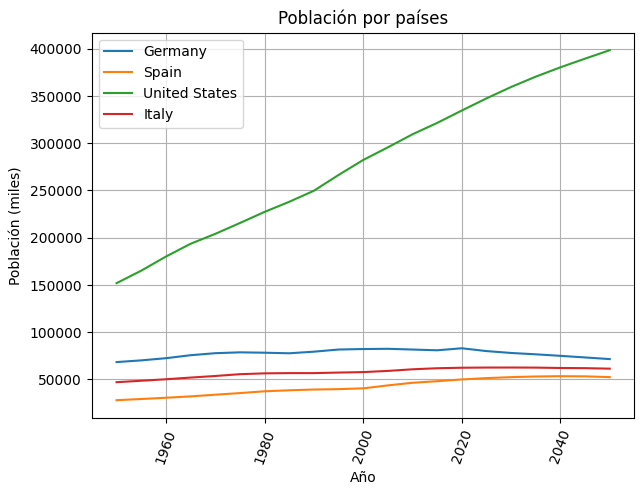

In [10]:
# Mediante matplotlib
# Seleccionamos los datos de los países
poblacion = df.loc[paises]

# Dibujamos la evolución de la población
plt.figure(figsize=(7,5))
for pais in paises:
    plt.plot(poblacion.columns.astype(int), poblacion.loc[pais], label=pais)

plt.xlabel('Año')
plt.ylabel('Población (miles)')
plt.title('Población por países')
plt.xticks(rotation=70)
plt.legend()
plt.grid(True)
plt.show()

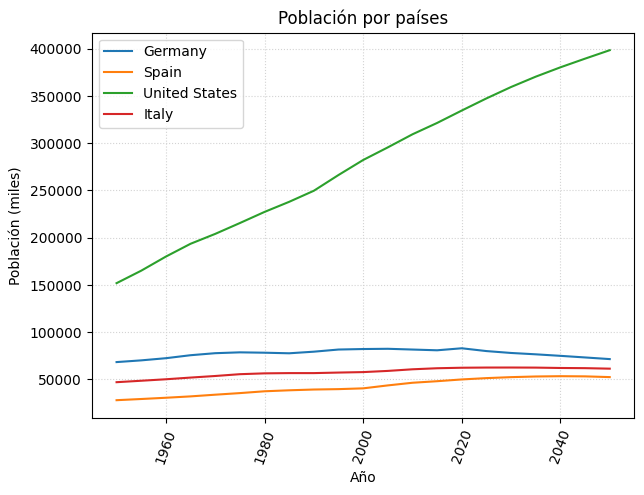

In [22]:
# Mediante pandas
# Seleccionamos los datos de los países
poblacion = df.loc[paises].T
poblacion.index = poblacion.index.astype(int)

poblacion.plot(figsize=(7,5))
plt.xlabel('Año')
plt.ylabel('Población (miles)')
plt.title('Población por países')
plt.xticks(rotation=70)
plt.legend()
plt.grid(color='lightgray', linestyle=':')
plt.show()

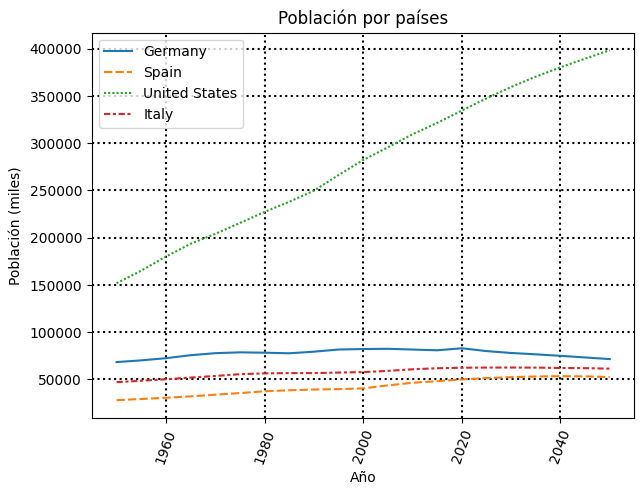

In [12]:
# Mediante seaborn

# Seleccionamos los datos de los países
poblacion = df.loc[paises].T.reset_index().astype(int) 
poblacion = pd.melt(poblacion, id_vars=['index'], value_vars=paises, var_name='País', value_name='Población')

plt.figure(figsize=(7,5))
sns.lineplot(data=poblacion, x='index', y='Población', hue='País', style='País')
plt.xlabel('Año')
plt.ylabel('Población (miles)')
plt.title('Población por países')
plt.xticks(rotation=70)
plt.legend()
plt.grid(color='k', linestyle=':', linewidth=1.5)
plt.show()

## Dibujar la evolución de los cinco países más poblados hasta 2010 y 2050  

Dibujar dos gráficas: una con la evolución para todo el periodo de los cinco países más poblados en 2010, y otra con los cinco países más poblados en 2050. Utilizaremos una función `plot_mas_poblados()` a la que daremos como argumento el año de interés.

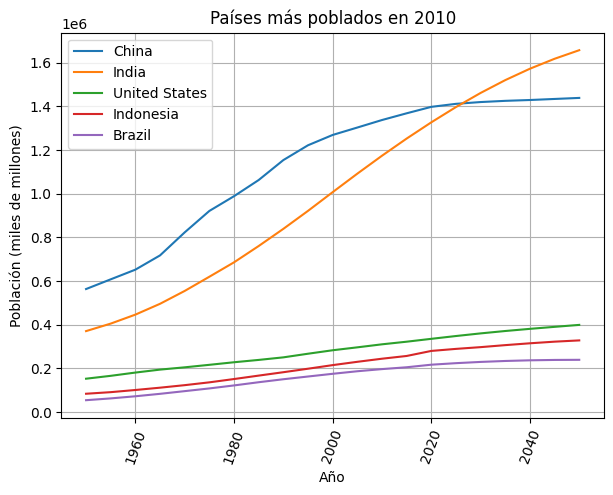

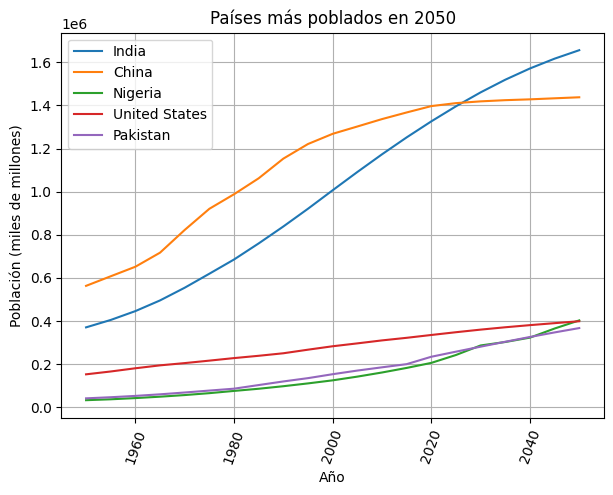

In [28]:
# Mediante matplotlib

def plot_mas_poblados(tabla, año):
    # Descartamos el índice 'World'
    tabla = tabla.drop('World', errors='ignore')

    # Seleccionamos los cinco países más poblados en el año dado
    top5_paises = tabla[año].nlargest(5).index
    poblacion_top5 = tabla.loc[top5_paises]

    # Dibujamos la evolución de la población
    plt.figure(figsize=(7,5))
    for pais in top5_paises:
        plt.plot(poblacion_top5.columns.astype(int), poblacion_top5.loc[pais], label=pais)

    plt.xlabel('Año')
    plt.ylabel('Población (miles de millones)')
    plt.title(f'Países más poblados en {año}')
    plt.xticks(rotation=70)
    plt.legend()
    plt.grid(True)
    plt.show()


plot_mas_poblados(df, '2010')
plot_mas_poblados(df, '2050')

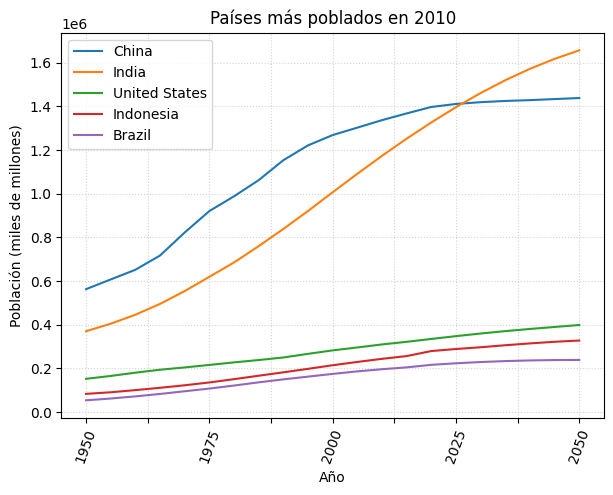

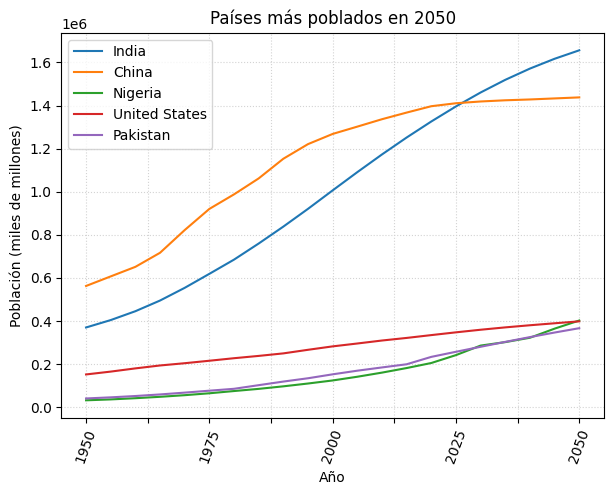

In [29]:
# Mediante pandas

def plot_mas_poblados(tabla, año):
    # Descartamos el índice 'World'
    tabla = tabla.drop('World', errors='ignore')

    # Seleccionamos los cinco países más poblados en el año dado
    top5_paises = tabla[año].nlargest(5).index
    poblacion_top5 = tabla.loc[top5_paises]

    # Dibujamos la evolución de la población
    poblacion_top5.T.plot(figsize=(7, 5))
    plt.xlabel('Año')
    plt.ylabel('Población (miles de millones)')
    plt.title(f'Países más poblados en {año}')
    plt.xticks(rotation=70)
    plt.legend()
    plt.grid(color='lightgray', linestyle=':')
    plt.show()

plot_mas_poblados(df, '2010')
plot_mas_poblados(df, '2050')

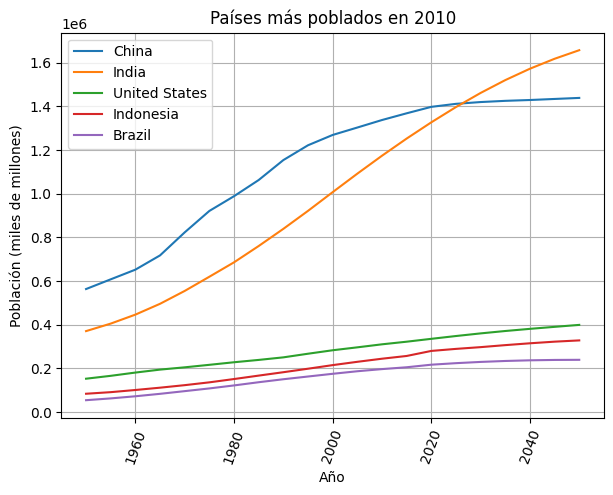

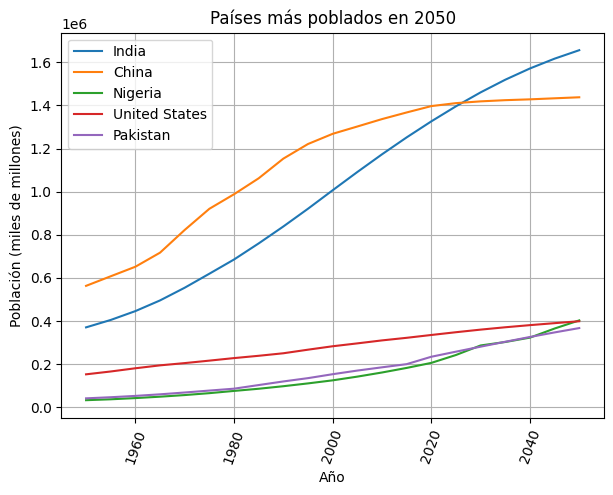

In [32]:
# Mediante seaborn

def plot_mas_poblados(tabla, año):
    # Filtramos el índice 'World'
    tabla = tabla.drop('World', errors='ignore')

    # Seleccionamos las cinco países más poblados en el año dado
    top5_paises = tabla[año].nlargest(5).index
    poblacion_top5 = tabla.loc[top5_paises]

    # Transformamos los datos para seaborn
    poblacion_top5 = poblacion_top5.T.reset_index().astype(int)
    poblacion_top5 = pd.melt(poblacion_top5, id_vars=['index'], value_vars=top5_paises, var_name='País', value_name='Población')

    plt.figure(figsize=(7, 5))
    sns.lineplot(data=poblacion_top5, x='index', y='Población', hue='País')
    plt.xlabel('Año')
    plt.ylabel('Población (miles de millones)')
    plt.title(f'Países más poblados en {año}')
    plt.xticks(rotation=70)
    plt.legend()
    plt.grid(True)
    plt.show()
    

plot_mas_poblados(df, '2010')
plot_mas_poblados(df, '2050')

## Análisis de la distribución de la población

### Histograma de la población en un año específico

Muestra la distribución de la población de todos los países en el año 2000. Esto puede ayudar a visualizar la asimetría y la dispersión de los datos.

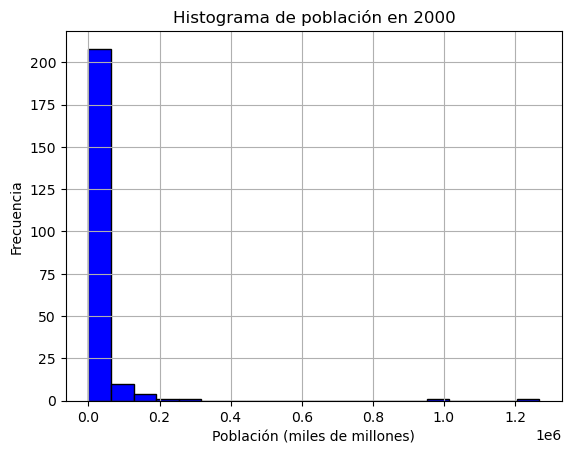

In [ ]:
# Mediante matplotlib



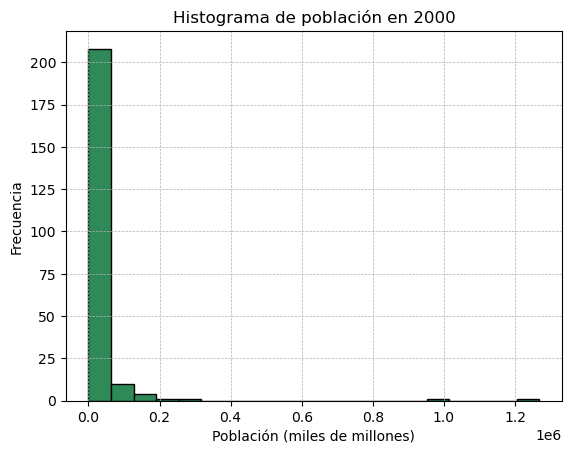

In [ ]:
# Mediante pandas



/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


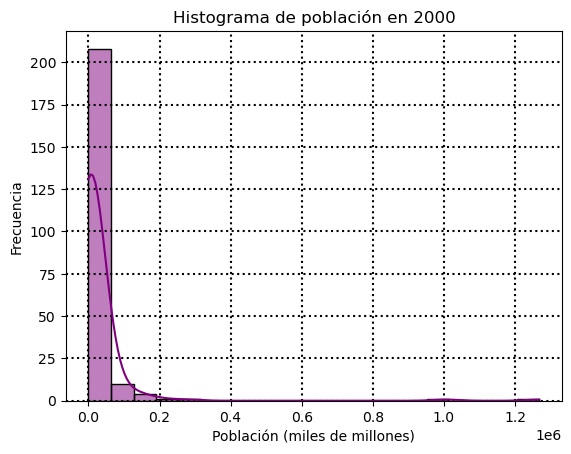

In [ ]:
# Mediante seaborn



¿La distribución de la población en el histograma es unimodal, bimodal o multimodal? ¿Qué implicaciones tiene esto en el análisis de datos? ¿Qué técnicas podrías aplicar para segmentar mejor los datos y mejorar la visualización?

### Diagrama de caja y bigotes de la población en un conjunto de años

Los diagramas de caja y bigotes (*boxplots*) son una herramienta muy útil para comparar la distribución de una variable entre diferentes grupos. Utiliza diagramas de caja y bigotes para comparar la distribución de la población de los países en los años 1950, 1980 y 2010.

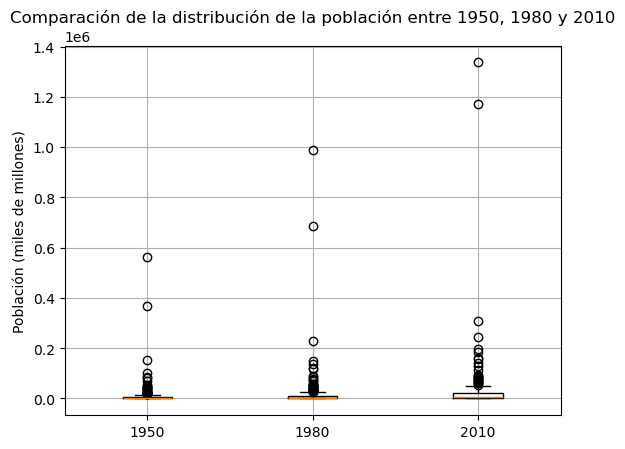

In [ ]:
# Mediante matplotlib



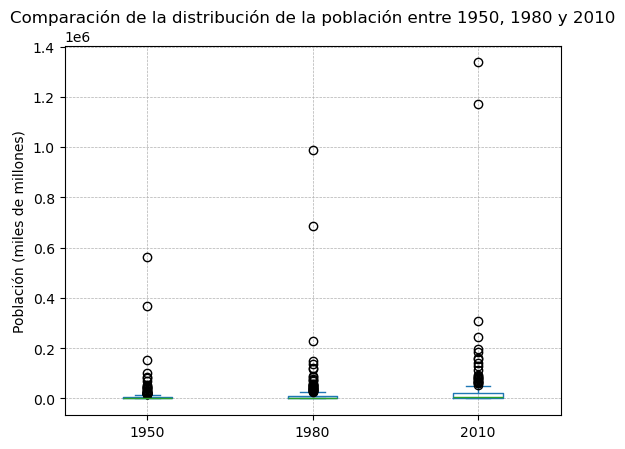

In [ ]:
# Mediante pandas



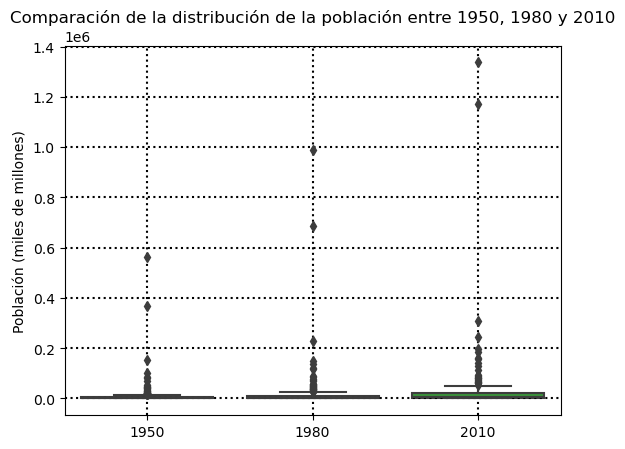

In [ ]:
# Mediante seaborn



La presencia de valores atípicos (*outliers*) puede dificultar la visualización de la distribución principal de los datos en un *boxplot*. Mejora las visualizaciones anteriores para facilitar el análisis de los datos a través de mecanismos como los siguientes:

1. Identificación y eliminación de valores atípicos

    Identifica valores atípicos utilizando el rango intercuartílico (RIQ). Calcula el RIQ para cada año y define un umbral para considerar un valor como atípico (por ejemplo, 2.5 veces el RIQ). Elimina los valores que estén por encima o por debajo de este umbral y vuelve a generar el *boxplot* para ver cómo ha mejorado la visualización.

2. Transformación de los datos

    La transformación logarítmica puede ayudar a reducir el impacto de los valores atípicos y a mejorar la visualización de datos con distribuciones sesgadas. Aplica la transformación logarítmica a los datos de población (usando `np.log1p()` para evitar logaritmos de cero) y genera un nuevo *boxplot* con los datos transformados. Compara el *boxplot* con los datos originales y el *boxplot* con los datos transformados, y reflexiona sobre cómo la transformación logarítmica ha afectado la visualización y la interpretación de los datos.

3. Visualización con escala logarítmica

    También es posible usar una escala logarítmica directamente en el eje y del *boxplot* para lograr un efecto similar a la transformación logarítmica. Genera un nuevo *boxplot* con el eje y en escala logarítmica (usando `plt.yscale('log')`). Compara este *boxplot* con los anteriores y reflexiona sobre las ventajas y desventajas de cada enfoque (transformación logarítmica vs. escala logarítmica).

4. Análisis de los valores atípicos

    Investiga los valores atípicos que has identificado. ¿Qué países corresponden a estos valores? ¿Hay alguna razón particular por la que estos países tengan una población tan diferente al resto? Reflexiona sobre si los valores atípicos son errores en los datos o representan situaciones reales. ¿Qué implicaciones tienen los valores atípicos para el análisis de la población mundial?

### Diagrama de violín de la población en un conjunto de años

Los diagramas de violín (*violin plots*) son otra herramienta útil para comparar la distribución de una variable entre diferentes grupos. Utiliza diagramas de violín para comparar la distribución de la población de los países en los años 1950, 1980 y 2010.

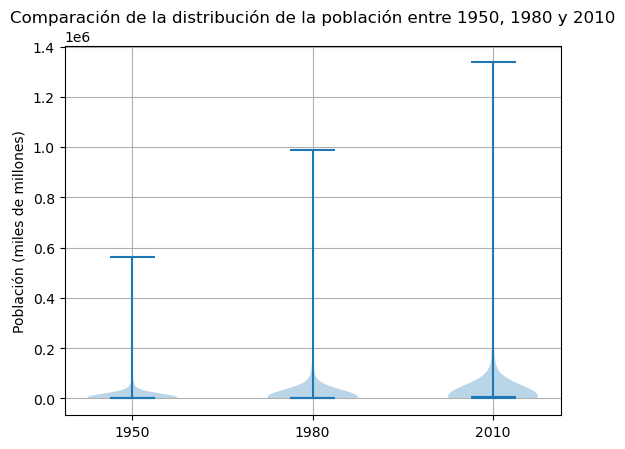

In [ ]:
# Mediante matplotlib



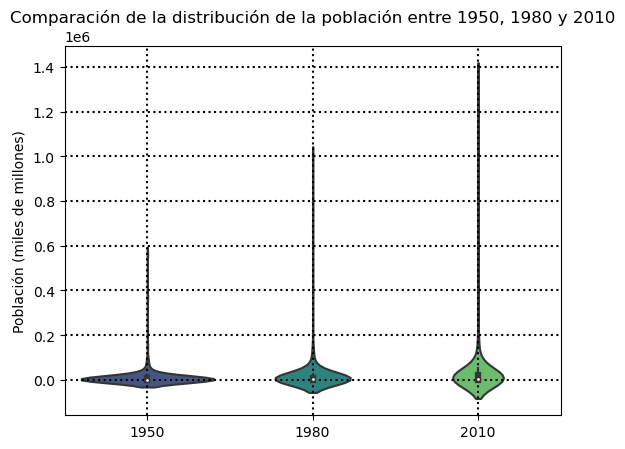

In [ ]:
# Mediante seaborn



Compara los *boxplots* y diagramas de violín anteriores para analizar la distribución de la población. ¿Qué ventajas y desventajas tiene cada uno? ¿Cuándo es más útil usar uno u otro?

## Conclusión

Realiza un análisis crítico de las tareas anteriores. Reflexiona sobre el uso de las librerías utilizadas, incluyendo aspectos como sus ventajas y desventajas, facilidad de uso, y cualquier aspecto que consideres relevante.